<a href="https://colab.research.google.com/github/pokexpert/lab/blob/main/joanne_superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [4]:
#creating database + connect to an in-memory SQLite database
import sqlite3
connection = sqlite3.connect('superhero_db.sqlite')
print("Database created and connected!")

#creating cursor
cursor = connection.cursor()
print("Cursor created!")

#creating hero table with data given in csv
cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT,
    team TEXT
)
''')

print("heroes table created!")

#creating villains table with data given in csv
cursor.execute('''
CREATE TABLE IF NOT EXISTS villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT
)
''')

print("villains table created!")

#creating battles table with data given in csv
cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    villain_id INTEGER,
    outcome TEXT,
    FOREIGN KEY (hero_id) REFERENCES heroes(id),
    FOREIGN KEY (villain_id) REFERENCES villains(id)
)
''')

print("battles table created!")

Database created and connected!
Cursor created!
heroes table created!
villains table created!
battles table created!


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [5]:
import pandas as pd

#load data from CSV into a DataFrame
heroes = pd.read_csv('heroes.csv')
#display the first few rows of the DataFrame
print(heroes.head())

#load data from CSV into a DataFrame
villains = pd.read_csv('villains.csv')
#display the first few rows of the DataFrame
print(villains.head())

#load data from CSV into a DataFrame
battles = pd.read_csv('battles.csv')
#display the first few rows of the DataFrame
print(battles.head())

#insert data from the DataFrame into the heroes table
heroes.to_sql('heroes', connection, if_exists= 'replace', index = False)
print("Data from CSV has been inserted into the heroes table.")

#insert data from the DataFrame into the villains table
villains.to_sql('villains', connection, if_exists='replace', index=False)
print("Data from CSV has been inserted into the villains table.")

#insert data from the DataFrame into the battles table
battles.to_sql('battles', connection, if_exists='replace', index=False)
print("Data from CSV has been inserted into the villains table.")

   id        name             power            team
0   1  Spider-Man      Web-slinging        Avengers
1   2    Iron Man     Powered Armor        Avengers
2   3      Batman  Genius Detective  Justice League
3   4    Superman    Super Strength  Justice League
4   5        Thor    God of Thunder        Avengers
   id          name                           evil_plan
0   1  Green Goblin                  Terrorize New York
1   2        Thanos         Collect all Infinity Stones
2   3         Joker              Spread chaos in Gotham
3   4    Lex Luthor                     Defeat Superman
4   5          Loki  Trick humanity into worshiping him
   id  hero_id  villain_id       outcome
0   1        1          10  Villain Wins
1   2        9           3     Hero Wins
2   3        8           1          Draw
3   4        5           4  Villain Wins
4   5        1           7     Hero Wins
Data from CSV has been inserted into the heroes table.
Data from CSV has been inserted into the villains t

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [9]:
#fetch all superheroes and their powers from the heroes table
cursor.execute("SELECT name, power FROM heroes")
rows = cursor.fetchall()

#print the results
if rows:
    print("All superheroes and their powers:")
    for name, power in rows:
        print(f"{name}: {power}")

#fetch all battles where hero won from battles table
cursor.execute("SELECT * FROM battles WHERE outcome = 'Hero Wins'")
rows = cursor.fetchall()

#print the results
print("Hero won: ")
for row in rows:
  print(row)

#fetch all villains and their evil plans from the villains table
cursor.execute("SELECT name, evil_plan FROM villains")
rows = cursor.fetchall()

#print the results
if rows:
    print("All villains and their evil plans:")
    for name, power in rows:
        print(f"{name}: {power}")

#fetch the superhero who has fought the most battles
#gets name of hero and gets the number of battles fought
#joins hero with the correct number of battles fought
#order descending
cursor.execute('''
    SELECT hero.name AS hero_name, COUNT(battle.id) AS battles_fought
    FROM heroes hero
    LEFT JOIN battles battle ON hero.id = battle.hero_id
    GROUP BY hero.id, hero.name
    ORDER BY battles_fought DESC;
''')

#print the result
print(cursor.fetchone())

All superheroes and their powers:
Spider-Man: Web-slinging
Iron Man: Powered Armor
Batman: Genius Detective
Superman: Super Strength
Thor: God of Thunder
Wonder Woman: Amazonian Strength
Black Panther: Enhanced Agility
The Flash: Super Speed
Hulk: Super Strength
Doctor Strange: Mystic Arts
Hero won: 
(2, 9, 3, 'Hero Wins')
(5, 1, 7, 'Hero Wins')
(7, 9, 8, 'Hero Wins')
(8, 3, 2, 'Hero Wins')
(9, 7, 5, 'Hero Wins')
(13, 8, 9, 'Hero Wins')
(20, 3, 4, 'Hero Wins')
(29, 3, 5, 'Hero Wins')
(30, 5, 5, 'Hero Wins')
All villains and their evil plans:
Green Goblin: Terrorize New York
Thanos: Collect all Infinity Stones
Joker: Spread chaos in Gotham
Lex Luthor: Defeat Superman
Loki: Trick humanity into worshiping him
Ultron: AI world domination
Darkseid: Control the universe
Venom: Consume Spider-Man
Magneto: Mutant supremacy
Red Skull: Revive Hydra
('Batman', 7)


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [26]:
cursor.execute('DROP TABLE IF EXISTS SuperheroEquipment;')

#creating hero equipment table
#has hero id, equipment name that has 100 character max, description of the equipment, and powerlevel of the equipment
cursor.execute('''
CREATE TABLE SuperheroEquipment (
    hero_id INTEGER,
    equipment_name VARCHAR(100),
    description TEXT,
    powerlevel INTEGER,
    FOREIGN KEY (hero_id) REFERENCES heroes(hero_id)
);
''')

#creating data to insert into the equipment table
equipment = [
    (1, 'Web-Shooter', 'shoot webs from Spider-Man wrists', 56),
    (2, 'Iron Man Armour', 'mechanized suit with weapons and flight capability', 73),
    (3, 'Batsuit', 'high-tech suit equipped with gadgets for Batman', 60),
    (4, 'Kryptonian Suit', 'nearly indestructible suit that enhances durability and adapts to solar energy', 80),
    (5, 'Mjolnir', 'hammer wielded by Thor, capable of summoning lightning', 77),
    (6, 'Lasso of Truth', 'magical lasso that forces people to tell the truth and is unbreakable', 85),
    (7, 'Vibranium Suit', 'suit made from Vibranium that absorbs kinetic energy and enhances agility', 100),
    (8, 'Speed Force Ring', 'ring that stores his suit and is linked to the Speed Force for energy boosts', 86),
    (9, 'Gamma Gauntlets', 'gauntlets designed to enhance control and focus Hulk’s strength', 70),
    (10, 'Eye of Agamotto', 'mystical artifact containing the Time Stone, used for time manipulation', 72)
]

#inserting data created into the equipment table
cursor.executemany('''
    INSERT INTO SuperheroEquipment (hero_id, equipment_name, description, powerlevel)
    VALUES (?, ?, ?, ?);
''', equipment)

#making sure successfully inserted the data
connection.commit()
print('Inserted 10 equipments into the SuperheroEquipment table.')

#prints out our new table with the data
print('All equipments:')
for row in cursor.execute('SELECT * FROM SuperheroEquipment'):
    print(row)

#selects the strongest equipment and prints it
cursor.execute('''
    SELECT equipment_name, description, powerlevel
    FROM SuperheroEquipment
    ORDER BY powerlevel DESC
    LIMIT 1;
''')

print(cursor.fetchone())

Inserted 10 equipments into the SuperheroEquipment table.
All equipments:
(1, 'Web-Shooter', 'shoot webs from Spider-Man wrists', 56)
(2, 'Iron Man Armour', 'mechanized suit with weapons and flight capability', 73)
(3, 'Batsuit', 'high-tech suit equipped with gadgets for Batman', 60)
(4, 'Kryptonian Suit', 'nearly indestructible suit that enhances durability and adapts to solar energy', 80)
(5, 'Mjolnir', 'hammer wielded by Thor, capable of summoning lightning', 77)
(6, 'Lasso of Truth', 'magical lasso that forces people to tell the truth and is unbreakable', 85)
(7, 'Vibranium Suit', 'suit made from Vibranium that absorbs kinetic energy and enhances agility', 100)
(8, 'Speed Force Ring', 'ring that stores his suit and is linked to the Speed Force for energy boosts', 86)
(9, 'Gamma Gauntlets', 'gauntlets designed to enhance control and focus Hulk’s strength', 70)
(10, 'Eye of Agamotto', 'mystical artifact containing the Time Stone, used for time manipulation', 72)
('Vibranium Suit', 's

## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

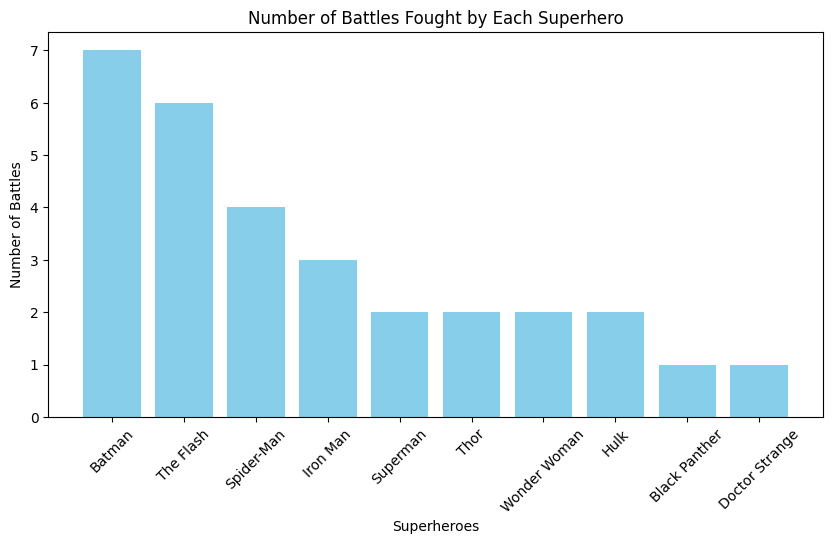

None


In [11]:
import matplotlib.pyplot as plt

#fetch the superhero who has fought the most battles
#gets name of hero and gets the number of battles fought
#joins hero with the correct number of battles fought
#order descending
cursor.execute('''
    SELECT hero.name AS hero_name, COUNT(battle.id) AS battles_fought
    FROM heroes hero
    LEFT JOIN battles battle ON hero.id = battle.hero_id
    GROUP BY hero.id, hero.name
    ORDER BY battles_fought DESC;
''')

#gets all the data
battle_data = cursor.fetchall()

#extract hero names and battle counts
heroes = [row[0] for row in battle_data]
battle_counts = [row[1] for row in battle_data]

#plot the data
#width 10 in height 5 in
plt.figure(figsize=(10, 5))
#x axis hero battle count = y aka bar height color is blue
plt.bar(heroes, battle_counts, color='skyblue')
#label x label y and gives title
plt.xlabel('Superheroes')
plt.ylabel('Number of Battles')
plt.title('Number of Battles Fought by Each Superhero')
#makes easier read name x axis
plt.xticks(rotation=45)
#show bar graph
plt.show()
#gets rows til none
print(cursor.fetchone())

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!